<h1 style="color:purple">Iris flower classification</h1>

In [36]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [14]:
iris_df = pd.read_csv("./Iris_data.csv")

In [15]:
# View the first few rows of the dataset
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris_df.drop("Id", axis=1, inplace=True)

In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h2 style="color:orange">
From above we can see that there's no null values
</h2>

In [18]:
# Summary statistics
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# Summary statistics include object datatype
iris_df.describe(include="object")

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [20]:
# Class distribution
class_counts = iris_df['Species'].value_counts()
print(class_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


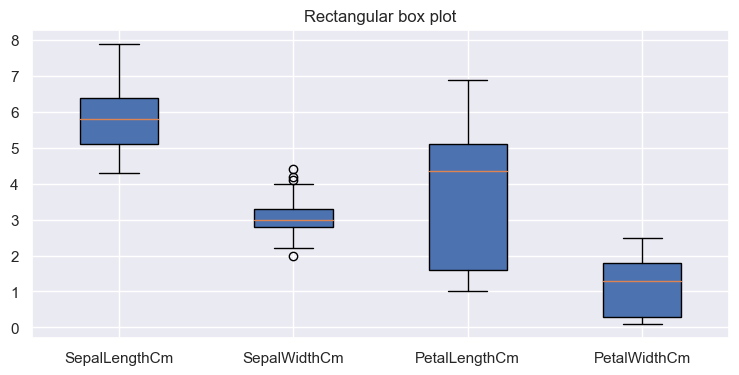

In [21]:
fig, ax = plt.subplots(nrows=1, figsize=(9, 4))
labels =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
ax.boxplot(iris_df.drop("Species",axis=1),
                        labels=labels,
                        patch_artist=True)  # will be used to label x-ticks
ax.set_title('Rectangular box plot')
sns.set_theme()
%matplotlib inline

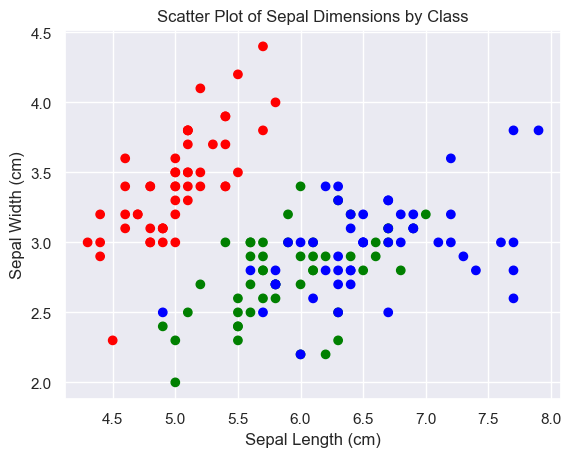

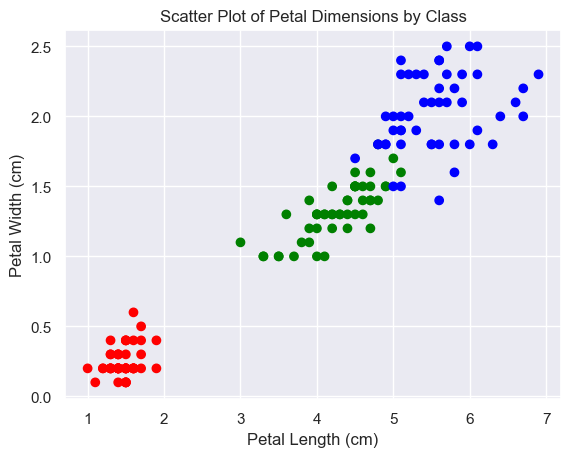

In [22]:
# Scatter plot by class
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=iris_df['Species'].map(colors))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Dimensions by Class')
plt.show()

plt.scatter(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'], c=iris_df['Species'].map(colors))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Dimensions by Class')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [28]:
X = iris_df.drop("Species",axis=1)
y = iris_df["Species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model = SVC()

In [33]:
model.fit(X_train,y_train)

SVC()

In [34]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


In [39]:
# Step 7: Make predictions using the trained model (optional)
new_data = np.array([[6.8, 4.0, 6.0, 2.0]])  # Example new data
predicted_class = model.predict(new_data)
print("Predicted class for new data:", predicted_class)

Predicted class for new data: ['Iris-virginica']


d:\Data science projects\IrisSage\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [40]:
import pickle

In [41]:
pickle.dump(model,open("model.pkl", "wb"))

In [42]:
pickle.open("model.pkl","")

AttributeError: module 'pickle' has no attribute 'open'